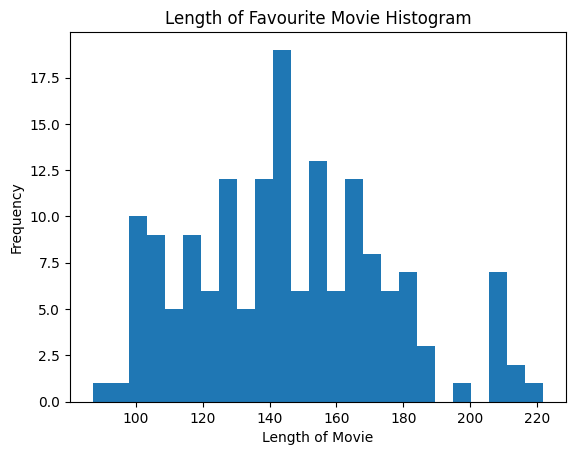

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read excel data
population = pd.read_excel("class_population_data.xlsx")

# Plot histograms
population["Length of fav movie (in mins)"].plot(kind="hist", bins=25, alpha=1)
plt.xlabel("Length of Movie")
plt.ylabel("Frequency")
plt.title("Length of Favourite Movie Histogram")
plt.show()

pop_movie_length = population["Length of fav movie (in mins)"].to_numpy()

In [21]:
# Population parameters
mu = np.mean(pop_movie_length)
sigma = np.std(pop_movie_length) 

print(f"Population mean: {mu:.03f}\nPopulation standard deviation: {sigma:.03f}")

Population mean: 145.801
Population standard deviation: 29.457


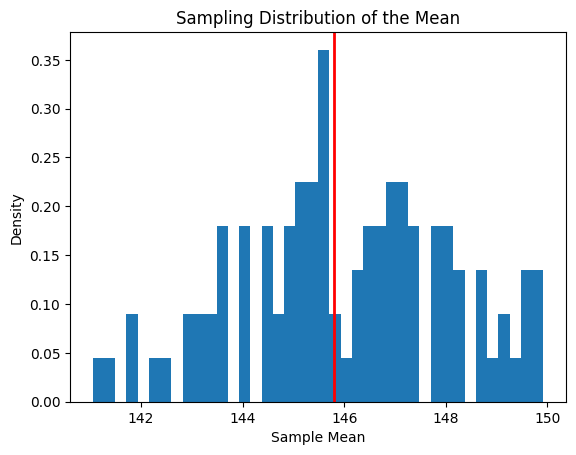

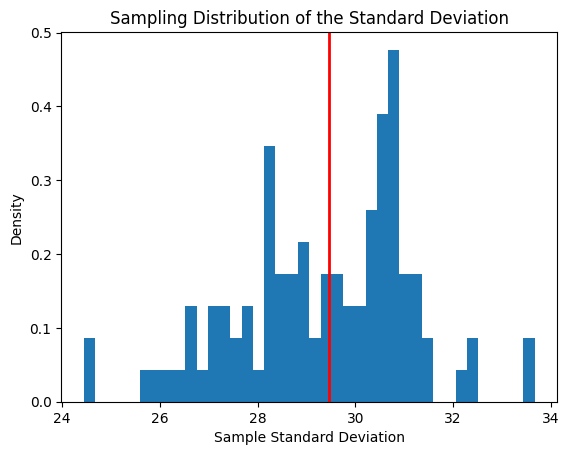

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate random samples
n = 5 * 30      # sample size
N = 100         # number of repetitions

sample_means = []
sample_sds = []

for _ in range(N):
    sample = np.random.normal(mu, sigma, n)
    sample_means.append(np.mean(sample))
    sample_sds.append(np.std(sample, ddof=1))

sample_means = np.array(sample_means)
sample_sds = np.array(sample_sds)

# ---- EXPORT TO EXCEL (ONE SHEET) ----
df = pd.DataFrame({
    "Sample Mean": sample_means,
    "Sample Std Dev": sample_sds
})

df.to_excel("sampling_results_final.xlsx", index=False)
# ------------------------------------

# Plot histogram of sample means
plt.hist(sample_means, bins=40, density=True)
plt.axvline(mu, linewidth=2, color="red")  # true mean
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.title("Sampling Distribution of the Mean")
plt.show()

# Plot histogram of sample standard deviations
plt.hist(sample_sds, bins=40, density=True)
plt.axvline(sigma, linewidth=2, color="red")  # true standard deviation
plt.xlabel("Sample Standard Deviation")
plt.ylabel("Density")
plt.title("Sampling Distribution of the Standard Deviation")
plt.show()


In [22]:
average_mean = np.mean(sample_means)
print(f"Average of means: {average_mean:.3f}")

Average of means: 145.741


In [24]:
standard_error = np.std(sample_means, ddof=1)
print(f"Standard error of sample means: {standard_error:.3f}")

Standard error of sample means: 2.076


In [28]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Create PDF with the statistics
with PdfPages('group_30.pdf') as pdf:
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('off')
    
    # Create text content
    text_content = f"""
    Group 30
    ═══════════════════════════════════════
    
    Average of Sample Means: {average_mean:.3f}
    
    Standard Error: {standard_error:.3f}
    
    """
    
    ax.text(0.5, 0.5, text_content, 
            ha='center', va='center', 
            fontsize=14, fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()

print("PDF created successfully: statistics_results.pdf")

PDF created successfully: statistics_results.pdf
